In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
rgen = np.random.RandomState(1)

x1 = rgen.normal(loc=50.0,scale=10.0, size= 42)
y1 = rgen.normal(loc=50.0,scale=18.0, size= 42)

x2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
y2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
k1 = np.array([x1, y1])
k2 = np.array([x2, y2])


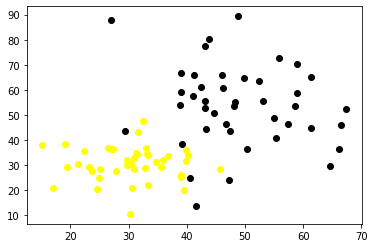

In [6]:
plt.scatter(k1[0], k1[1],  color='black', marker='o', label='class 1')
plt.scatter(k2[0], k2[1],  color='yellow', marker='o', label='class 2')
#plt.axis('off')
plt.show()


In [7]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2

            self.cost_.append(cost)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        return 1.0 / (1.0 + np.exp(-X))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [8]:
kg1 = k1.copy()
kg2 = k2.copy()
k1 = k1.T
k2 = k2.T
kg1 /= 100
kg2 /= 100

In [9]:
X = np.zeros( (84,2) )
X[:42] = k1
X[42:] = k2
X /= 100 


In [10]:
y = np.ones( (84), dtype=int )
y[:42] = -1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state=1, stratify=y )


In [23]:
ada = AdaLineGD(eta=0.01, n_iter=400)
ada.fit(X, y)

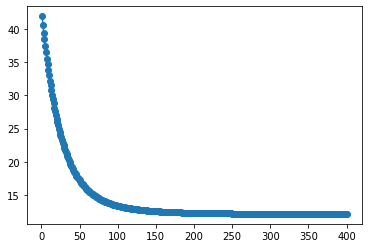

In [24]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.show()

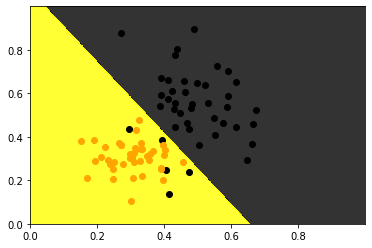

In [25]:
x1_min, x1_max = 0,1
x2_min, x2_max = 0,1
resol = 0.001

cmap = ListedColormap(['black', 'yellow'])

xx1, xx2 = np.meshgrid(
                       np.arange(x1_min, x1_max, resol), 
                       np.arange(x2_min, x2_max, resol) 
                      )

Z = ada.predict(
                np.array([xx1.ravel(), xx2.ravel()] ).T
                )
Z = Z.reshape(xx1.shape)

plt.contourf( xx1, xx2, Z, alpha=0.8, cmap=cmap )
plt.scatter(kg1[0], kg1[1],  color='black', marker='o', label='class 1')
plt.scatter(kg2[0], kg2[1],  color='orange', marker='o', label='class 2')
#plt.axis('off')
plt.show()